In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
# # Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = '/content/drive/MyDrive/files/311_Service_Requests_cleaned.csv'
df = pd.read_csv(data_path)

In [3]:
df.tail()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
1844154,62102788,2024-08-13 01:44:21,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11355.0,134-27 58 AVENUE,...,4.063620e+09,QUEENS,1031087.0,211038.0,PHONE,Unspecified,QUEENS,40.745803,-73.830968,"(40.74580311033212, -73.83096837117658)"
1844155,62097194,2024-08-13 01:47:56,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10466.0,775 EAST 225 STREET,...,2.048390e+09,BRONX,1023373.0,262538.0,PHONE,Unspecified,BRONX,40.887193,-73.858507,"(40.88719344375733, -73.8585074201454)"
1844156,62105650,2024-08-13 01:48:24,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10452.0,993 SUMMIT AVENUE,...,2.025230e+09,BRONX,1003519.0,242745.0,PHONE,Unspecified,BRONX,40.832933,-73.930368,"(40.8329333167966, -73.93036842441118)"
1844157,62101545,2024-08-13 01:48:57,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11213.0,ALBANY AVENUE,...,NaN,BROOKLYN,1001122.0,184083.0,ONLINE,Unspecified,BROOKLYN,40.671926,-73.939178,"(40.67192598097151, -73.93917754928395)"
1844158,62095814,2024-08-13 01:49:34,NaN,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11206.0,300 BUSHWICK AVENUE,...,3.030810e+09,BROOKLYN,1001008.0,196467.0,PHONE,Unspecified,BROOKLYN,40.705917,-73.939558,"(40.70591742280406, -73.93955770754009)"


In [4]:
df.describe()

,unique_key,incident_zip,bbl,x_coordinate_(state_plane),y_coordinate_(state_plane),latitude,longitude
count,1.844159e+06,1.843441e+06,1.689472e+06,1.833927e+06,1.834083e+06,1.833908e+06,1.833908e+06
mean,5.743502e+07,1.071048e+04,2.463768e+09,1.006448e+06,2.152778e+05,4.075752e+01,-7.391985e+01
std,2.633272e+06,5.463293e+02,1.148815e+09,1.832962e+04,3.091013e+04,8.484013e-02,6.613295e-02
min,5.293153e+07,8.300000e+01,0.000000e+00,9.133530e+05,1.210020e+05,4.049854e+01,-7.425495e+01
25%,5.505836e+07,1.004000e+04,1.021730e+09,9.951200e+05,1.903560e+05,4.068909e+01,-7.396082e+01
50%,5.742019e+07,1.046700e+04,2.048330e+09,1.005179e+06,2.141640e+05,4.075445e+01,-7.392442e+01
75%,5.964901e+07,1.122600e+04,3.062203e+09,1.018876e+06,2.428190e+05,4.083313e+01,-7.387500e+01
max,6.210622e+07,1.234500e+04,5.270001e+09,1.067173e+06,2.718760e+05,4.091287e+01,-7.370076e+01


In [5]:
# Standardizing Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

# Handling Missing Values, drop rows where certain critical columns are missing
df = df.dropna(subset=['unique_key', 'created_date'])

# Converting Data Types
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['closed_date'] = pd.to_datetime(df['closed_date'], errors='coerce')

# Display first few rows to verify
df.head()


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,52934953,2022-01-01 00:00:10,2022-01-01 01:00:11,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222.0,126 DRIGGS AVENUE,...,NaN,BROOKLYN,999866.0,202742.0,MOBILE,Unspecified,BROOKLYN,40.723143,-73.943662,"(40.72314288436064, -73.94366208445774)"
1,52933158,2022-01-01 00:00:57,2022-01-01 00:58:22,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11214.0,45 BAY 38 STREET,...,3.068668e+09,BROOKLYN,987344.0,156952.0,MOBILE,Unspecified,BROOKLYN,40.597473,-73.988859,"(40.59747269272421, -73.98885877127528)"
2,52938624,2022-01-01 00:01:04,2022-01-01 00:18:49,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10025.0,998 AMSTERDAM AVENUE,...,1.018810e+09,MANHATTAN,994168.0,231674.0,MOBILE,Unspecified,MANHATTAN,40.802562,-73.964176,"(40.80256198626038, -73.96417609586966)"
3,52931678,2022-01-01 00:01:17,2022-01-01 02:55:16,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10456.0,974 SHERIDAN AVENUE,...,2.024550e+09,BRONX,1006601.0,241609.0,ONLINE,Unspecified,BRONX,40.829808,-73.919235,"(40.82980806226658, -73.91923492133385)"
4,52934960,2022-01-01 00:01:20,2022-01-01 00:07:25,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10026.0,95 LENOX AVENUE,...,1.018240e+09,MANHATTAN,998074.0,231293.0,ONLINE,Unspecified,MANHATTAN,40.801511,-73.950068,"(40.80151099800635, -73.9500683762245)"


In [6]:
print(df.columns)

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_(state_plane)', 'y_coordinate_(state_plane)',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location'],
      dtype='object')


In [7]:
print(df.columns)  # Check to ensure the columns are no longer in the DataFrame

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_(state_plane)', 'y_coordinate_(state_plane)',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location'],
      dtype='object')


In [8]:
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,52934953,2022-01-01 00:00:10,2022-01-01 01:00:11,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222.0,126 DRIGGS AVENUE,...,NaN,BROOKLYN,999866.0,202742.0,MOBILE,Unspecified,BROOKLYN,40.723143,-73.943662,"(40.72314288436064, -73.94366208445774)"
1,52933158,2022-01-01 00:00:57,2022-01-01 00:58:22,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11214.0,45 BAY 38 STREET,...,3.068668e+09,BROOKLYN,987344.0,156952.0,MOBILE,Unspecified,BROOKLYN,40.597473,-73.988859,"(40.59747269272421, -73.98885877127528)"
2,52938624,2022-01-01 00:01:04,2022-01-01 00:18:49,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10025.0,998 AMSTERDAM AVENUE,...,1.018810e+09,MANHATTAN,994168.0,231674.0,MOBILE,Unspecified,MANHATTAN,40.802562,-73.964176,"(40.80256198626038, -73.96417609586966)"
3,52931678,2022-01-01 00:01:17,2022-01-01 02:55:16,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10456.0,974 SHERIDAN AVENUE,...,2.024550e+09,BRONX,1006601.0,241609.0,ONLINE,Unspecified,BRONX,40.829808,-73.919235,"(40.82980806226658, -73.91923492133385)"
4,52934960,2022-01-01 00:01:20,2022-01-01 00:07:25,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10026.0,95 LENOX AVENUE,...,1.018240e+09,MANHATTAN,998074.0,231293.0,ONLINE,Unspecified,MANHATTAN,40.801511,-73.950068,"(40.80151099800635, -73.9500683762245)"


In [9]:
df = df.drop_duplicates()

In [10]:
df.describe()

,unique_key,created_date,closed_date,incident_zip,bbl,x_coordinate_(state_plane),y_coordinate_(state_plane),latitude,longitude
count,1.844159e+06,1844159,1808006,1.843441e+06,1.689472e+06,1.833927e+06,1.834083e+06,1.833908e+06,1.833908e+06
mean,5.743502e+07,2023-04-19 21:27:45.033521408,2023-04-23 23:28:05.231892736,1.071048e+04,2.463768e+09,1.006448e+06,2.152778e+05,4.075752e+01,-7.391985e+01
min,5.293153e+07,2022-01-01 00:00:10,2022-01-01 00:07:25,8.300000e+01,0.000000e+00,9.133530e+05,1.210020e+05,4.049854e+01,-7.425495e+01
25%,5.505836e+07,2022-08-09 21:46:07.500000,2022-08-13 03:10:51.249999872,1.004000e+04,1.021730e+09,9.951200e+05,1.903560e+05,4.068909e+01,-7.396082e+01
50%,5.742019e+07,2023-04-25 22:00:27,2023-05-05 07:30:00.500000,1.046700e+04,2.048330e+09,1.005179e+06,2.141640e+05,4.075445e+01,-7.392442e+01
75%,5.964901e+07,2023-12-05 19:05:43.500000,2023-12-12 20:01:03.750000128,1.122600e+04,3.062203e+09,1.018876e+06,2.428190e+05,4.083313e+01,-7.387500e+01
max,6.210622e+07,2024-08-13 01:49:34,2024-08-13 01:50:18,1.234500e+04,5.270001e+09,1.067173e+06,2.718760e+05,4.091287e+01,-7.370076e+01
std,2.633272e+06,NaN,NaN,5.463293e+02,1.148815e+09,1.832962e+04,3.091013e+04,8.484013e-02,6.613295e-02


In [11]:
df['created_date'] = df['created_date'].fillna('Unknown')

In [12]:
df = df.dropna(axis=1, thresh=int(0.7 * len(df)))  # Drops columns with more than 70% missing values

### **Descriptive analysis**

In [14]:
complaint_type_counts = df['complaint_type'].value_counts()
print(complaint_type_counts)

complaint_type
Noise - Residential         868331
Noise - Street/Sidewalk     395921
Noise - Commercial          170023
Noise - Vehicle             147560
Noise                       133561
Noise - Helicopter          103641
Noise - Park                 21768
Noise - House of Worship      3354
Name: count, dtype: int64


In [15]:
borough_counts = df['borough'].value_counts()
print(borough_counts)

borough
MANHATTAN        495851
BRONX            481128
BROOKLYN         465199
QUEENS           362593
STATEN ISLAND     38777
Unspecified         611
Name: count, dtype: int64


In [16]:
df['hour'] = df['created_date'].dt.hour
hour_distribution = df['hour'].value_counts().sort_index()
print(hour_distribution)

hour
0     165040
1     113265
2      72708
3      49924
4      38000
5      27792
6      28370
7      30520
8      34546
9      39089
10     40042
11     42159
12     42834
13     44284
14     50065
15     55505
16     62280
17     71419
18     83659
19     96886
20    117556
21    145370
22    197659
23    195187
Name: count, dtype: int64


In [17]:
df['response_time'] = (df['closed_date'] - df['created_date']).dt.total_seconds() / 3600  # Convert to hours
response_time_stats = df['response_time'].describe()
print(response_time_stats)

count    1.808006e+06
mean     7.749618e+01
std      5.979110e+02
min     -9.033333e-01
25%      3.805556e-01
50%      8.083333e-01
75%      2.431389e+00
max      1.121812e+04
Name: response_time, dtype: float64


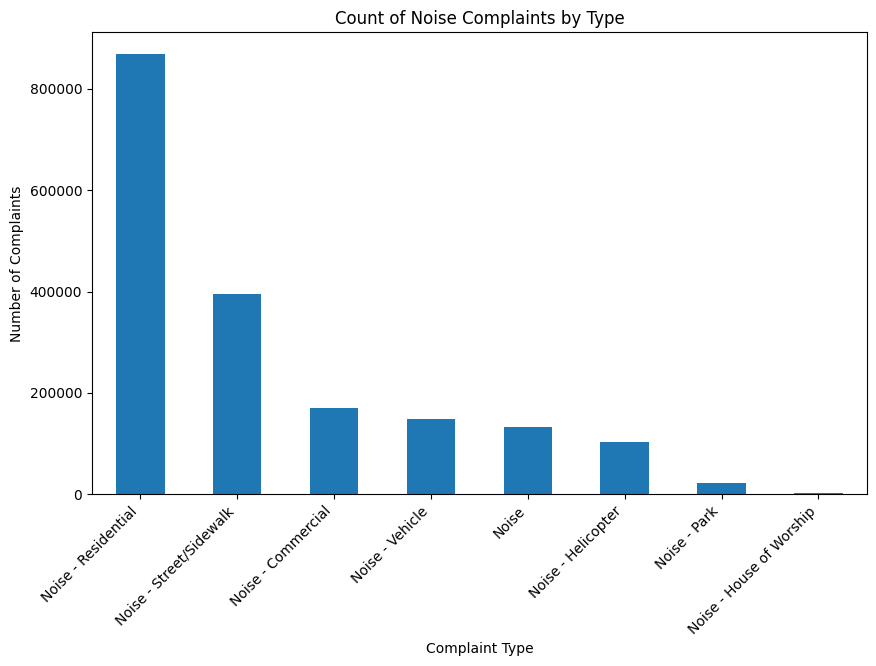

In [18]:
import matplotlib.pyplot as plt

complaint_type_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Noise Complaints by Type')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha="right")
plt.show()

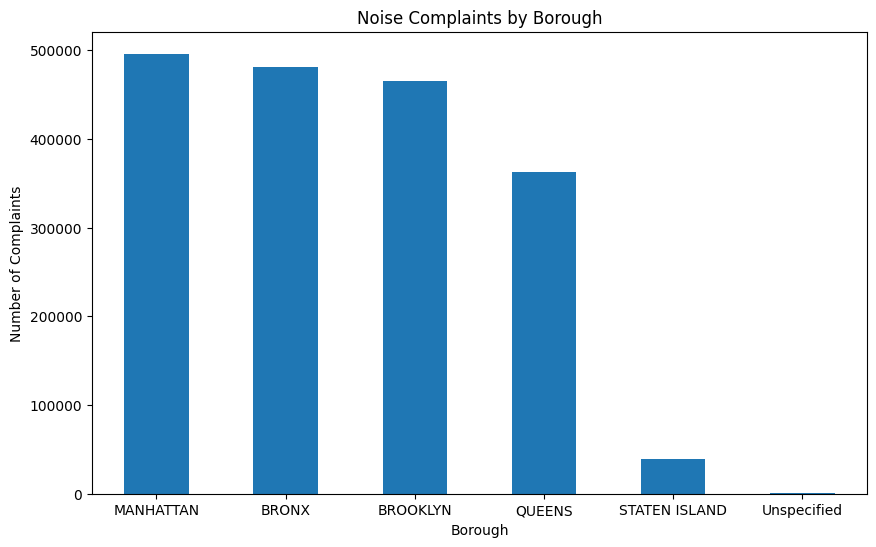

In [19]:
borough_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Noise Complaints by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.show()

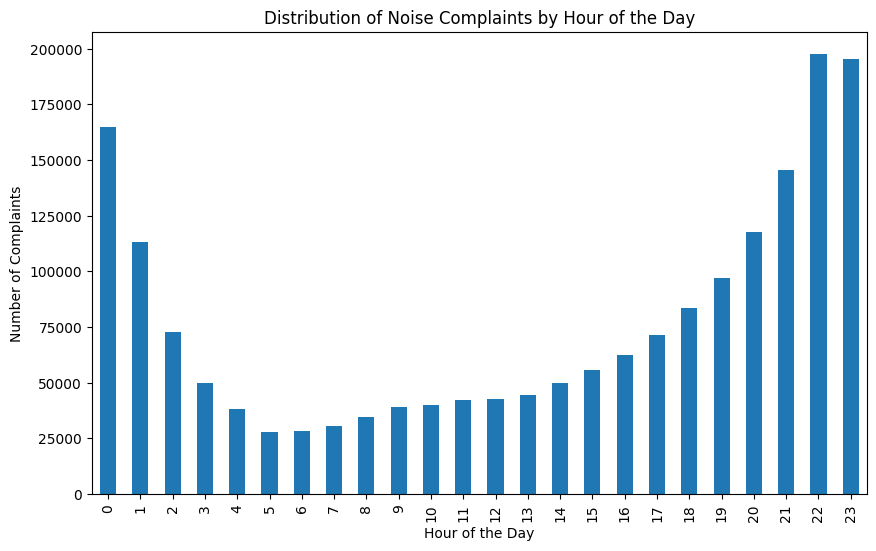

In [20]:
hour_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Noise Complaints by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Complaints')
plt.show()

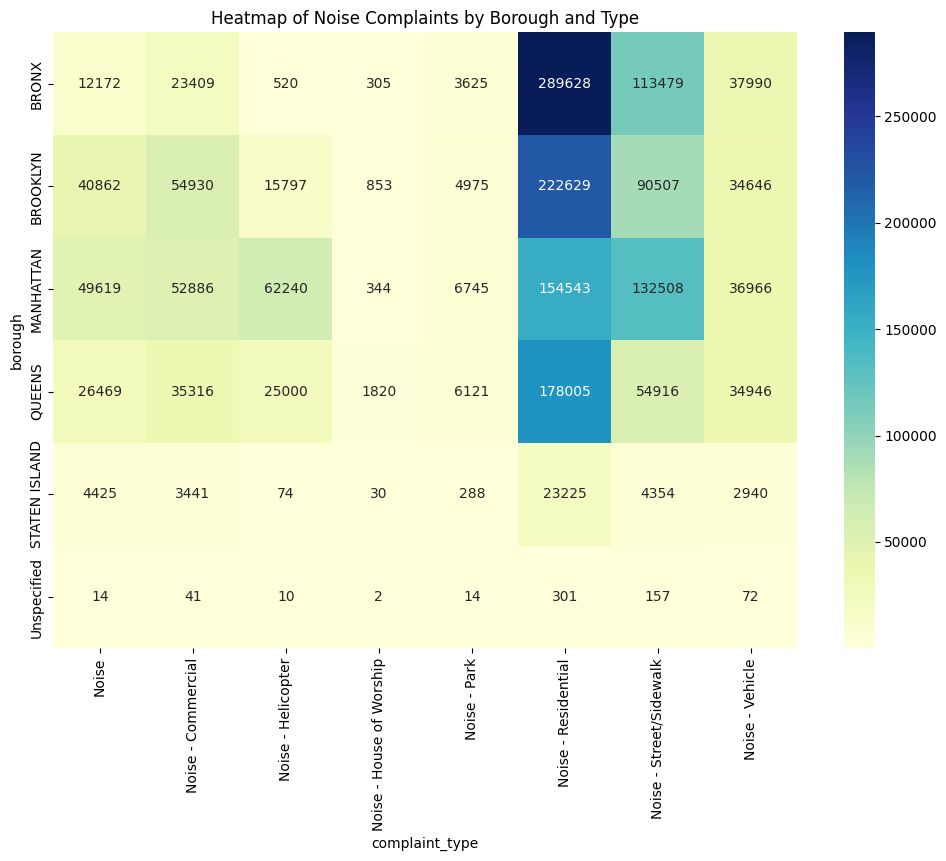

In [21]:
import seaborn as sns

heatmap_data = pd.crosstab(df['borough'], df['complaint_type'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Noise Complaints by Borough and Type')
plt.show()


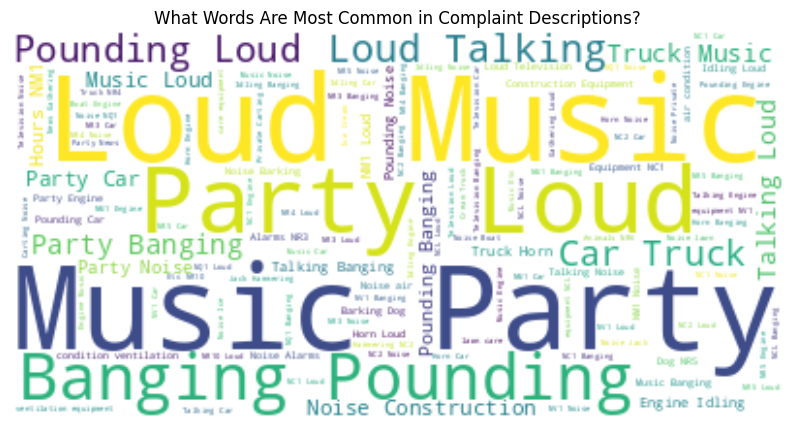

In [22]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Concatenate all text from the 'Descriptor' field into a single string
text = " ".join(str(description) for description in df['descriptor'].dropna())

# Define stopwords (common words to exclude from the word cloud)
stopwords = set(STOPWORDS)
# Add custom stopwords if needed
custom_stopwords = {'nypd', 'department', 'police'}
stopwords.update(custom_stopwords)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=200, contour_width=3, contour_color='steelblue').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("What Words Are Most Common in Complaint Descriptions?")
plt.show()


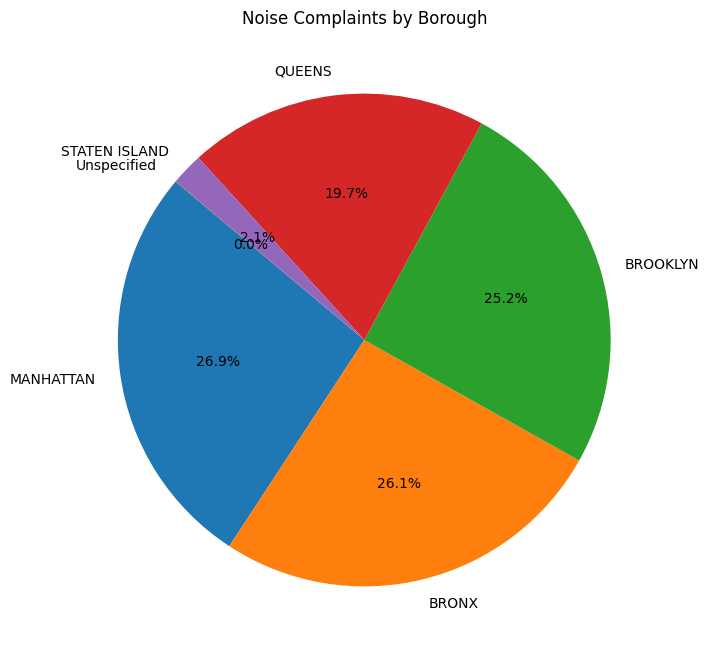

In [23]:
borough_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140)
plt.title('Noise Complaints by Borough')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()